# Kod do wygenerownia i porównania różnych modeli klasyfikacji (Różne miary)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
np.random.seed = 2

In [2]:
# Wczytanie danych
train_data = pd.read_csv("train_data_with_features.csv")
test_data = pd.read_csv("test_data_with_features.csv")

In [3]:
# Przygotowanie cech i etykiet
y_train = train_data['class']
X_train = train_data.drop(['class', "path", "filename", "R", "G", "B", "brightness"], axis=1)
y_test = test_data['class']
X_test = test_data.drop(['class', "path", "filename", "R", "G", "B", "brightness"], axis=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [4]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Zakodowanie etykiet w sposób jednolity
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)  

    # Trening modelu
    model.fit(X_train, y_train_encoded)
    
    # Predykcja na zbiorze treningowym i testowym
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Dokładności
    train_acc = accuracy_score(y_train_encoded, y_train_pred)
    test_acc = accuracy_score(y_test_encoded, y_test_pred)

    # Raporty klasyfikacji
    train_report = classification_report(y_train_encoded, y_train_pred, target_names=label_encoder.classes_.tolist())
    test_report = classification_report(y_test_encoded, y_test_pred, target_names=label_encoder.classes_.tolist())

    # Precision, Recall, F1 score
    train_precision = precision_score(y_train_encoded, y_train_pred, average='weighted')
    train_recall = recall_score(y_train_encoded, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train_encoded, y_train_pred, average='weighted')

    test_precision = precision_score(y_test_encoded, y_test_pred, average='weighted')
    test_recall = recall_score(y_test_encoded, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test_encoded, y_test_pred, average='weighted')

    # Macierze pomyłek
    train_cm = confusion_matrix(y_train_encoded, y_train_pred)
    test_cm = confusion_matrix(y_test_encoded, y_test_pred)

    # Wypisanie wyników
    print(f"\n📊 Dokładność (trening): {train_acc:.4f}")
    print(f"Precision (trening): {train_precision:.4f}")
    print(f"Recall (trening): {train_recall:.4f}")
    print(f"F1 Score (trening): {train_f1:.4f}")
    print("Raport klasyfikacji (trening):\n", train_report)

    print(f"\n📊 Dokładność (test): {test_acc:.4f}")
    print(f"Precision (test): {test_precision:.4f}")
    print(f"Recall (test): {test_recall:.4f}")
    print(f"F1 Score (test): {test_f1:.4f}")
    print("Raport klasyfikacji (test):\n", test_report)

    # Wizualizacja macierzy pomyłek
    plt.figure(figsize=(12, 6))

    # Macierz pomyłek dla zbioru treningowego
    plt.subplot(1, 2, 1)
    sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title("Macierz Pomyłek - Trening")
    plt.xlabel("Przewidywania")
    plt.ylabel("Rzeczywiste")

    # Macierz pomyłek dla zbioru testowego
    plt.subplot(1, 2, 2)
    sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title("Macierz Pomyłek - Test")
    plt.xlabel("Przewidywania")
    plt.ylabel("Rzeczywiste")

    # Wyświetlenie wykresu
    plt.tight_layout()
    plt.show()


## SoftVote Weights

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3 = LogisticRegression( max_iter=1000)
estimators=[('DecisionTree', model1), ('KNN', model2), ('LR', model3)]


📊 Dokładność (trening): 1.0000
Precision (trening): 1.0000
Recall (trening): 1.0000
F1 Score (trening): 1.0000
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       1.00      1.00      1.00       429
        Butka Ghevda       1.00      1.00      1.00       296
       Gabara Ghevda       1.00      1.00      1.00       297
             God Wal       1.00      1.00      1.00       430
          Hirva Lamb       1.00      1.00      1.00       296
            Kadu wal       1.00      1.00      1.00       428
            Kala Wal       1.00      1.00      1.00       298
     Lal lamb shenga       1.00      1.00      1.00       296
Lamb Shiracha Ghevda       1.00      1.00      1.00       300
      Shravan Ghevda       1.00      1.00      1.00       300
          Tambda wal       1.00      1.00      1.00       300
       Vatana Ghevda       1.00      1.00      1.00       360

            accuracy                           1

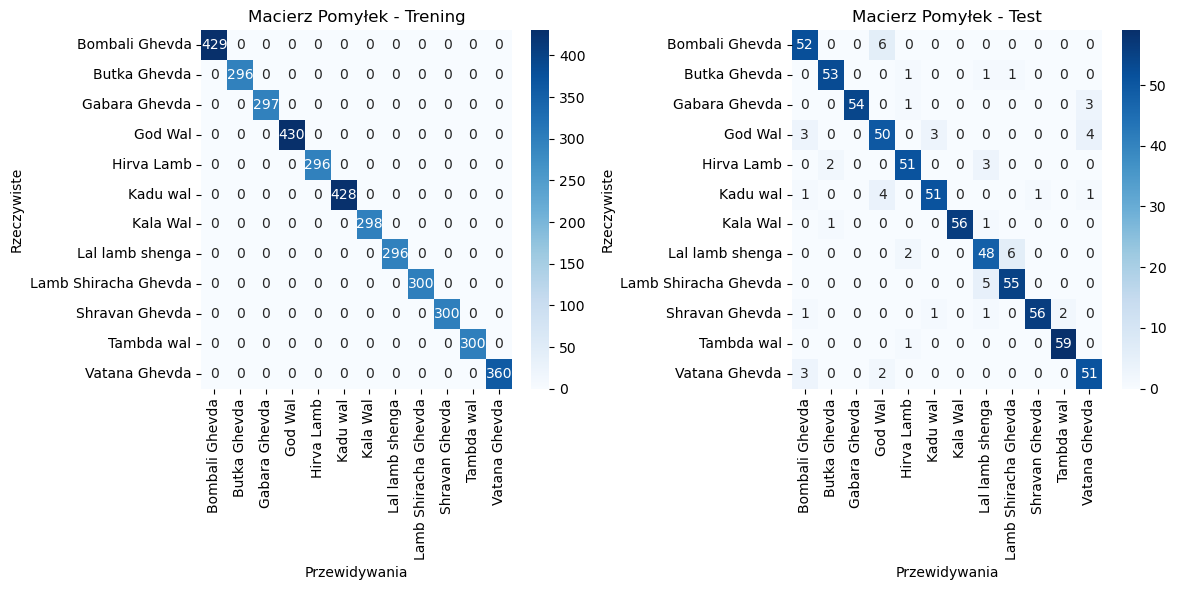

In [6]:
evaluate_model(model1, X_train, X_test, y_train, y_test)


📊 Dokładność (trening): 0.9489
Precision (trening): 0.9508
Recall (trening): 0.9489
F1 Score (trening): 0.9494
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       0.86      0.88      0.87       429
        Butka Ghevda       1.00      1.00      1.00       296
       Gabara Ghevda       0.97      0.96      0.97       297
             God Wal       0.82      0.91      0.86       430
          Hirva Lamb       0.98      0.98      0.98       296
            Kadu wal       0.94      0.94      0.94       428
            Kala Wal       0.99      0.99      0.99       298
     Lal lamb shenga       0.96      0.97      0.97       296
Lamb Shiracha Ghevda       0.99      0.98      0.99       300
      Shravan Ghevda       0.99      0.92      0.96       300
          Tambda wal       0.99      1.00      1.00       300
       Vatana Ghevda       0.98      0.91      0.94       360

            accuracy                           0

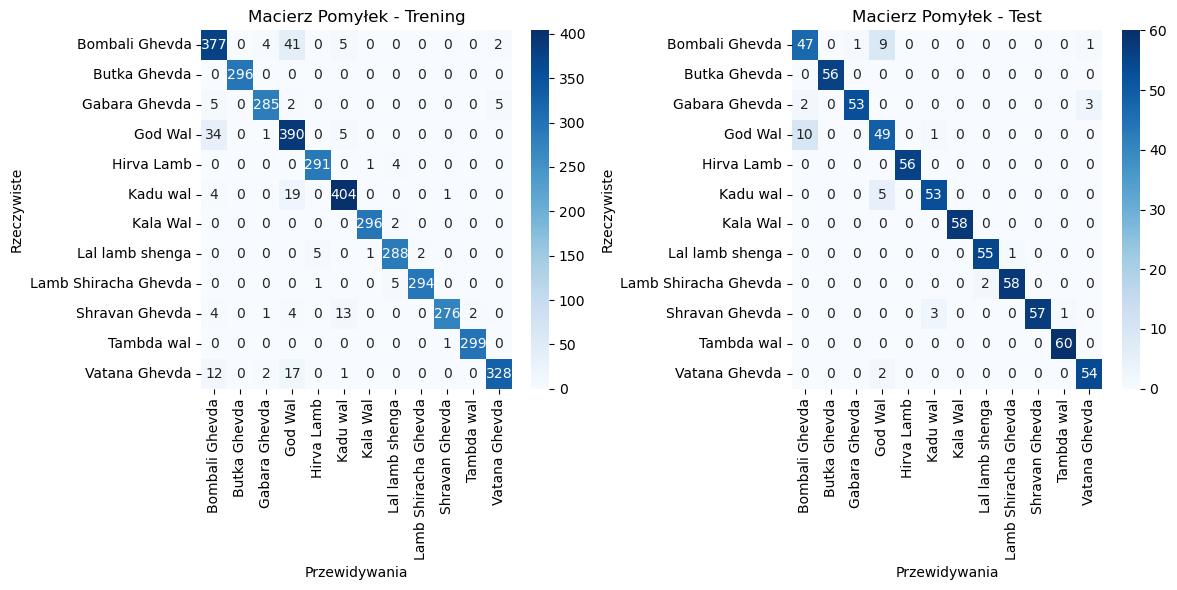

In [7]:
evaluate_model(model2, X_train, X_test, y_train, y_test)


📊 Dokładność (trening): 0.8906
Precision (trening): 0.8920
Recall (trening): 0.8906
F1 Score (trening): 0.8906
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       0.81      0.78      0.79       429
        Butka Ghevda       0.96      1.00      0.98       296
       Gabara Ghevda       0.97      0.95      0.96       297
             God Wal       0.76      0.82      0.79       430
          Hirva Lamb       0.90      0.81      0.85       296
            Kadu wal       0.90      0.96      0.93       428
            Kala Wal       0.87      0.89      0.88       298
     Lal lamb shenga       0.86      0.89      0.87       296
Lamb Shiracha Ghevda       0.92      0.94      0.93       300
      Shravan Ghevda       0.99      0.89      0.94       300
          Tambda wal       0.99      1.00      0.99       300
       Vatana Ghevda       0.86      0.84      0.85       360

            accuracy                           0

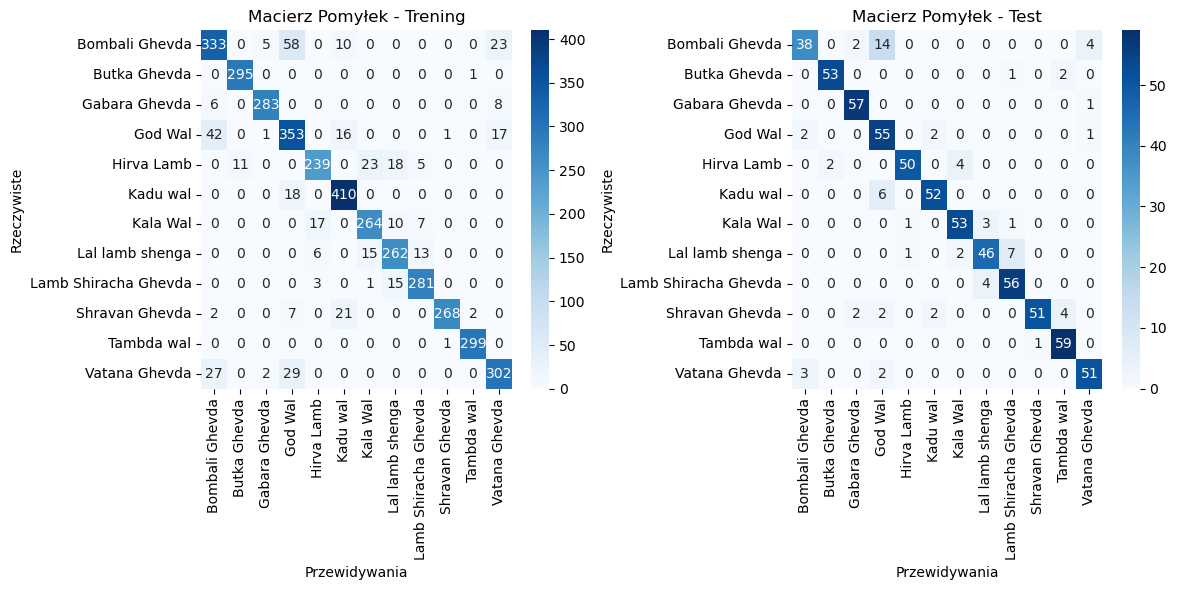

In [8]:
evaluate_model(model3, X_train, X_test, y_train, y_test)


📊 Dokładność (trening): 0.9811
Precision (trening): 0.9817
Recall (trening): 0.9811
F1 Score (trening): 0.9812
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       0.97      0.95      0.96       429
        Butka Ghevda       1.00      1.00      1.00       296
       Gabara Ghevda       0.99      1.00      0.99       297
             God Wal       0.92      0.98      0.95       430
          Hirva Lamb       1.00      0.99      0.99       296
            Kadu wal       0.95      0.98      0.97       428
            Kala Wal       1.00      1.00      1.00       298
     Lal lamb shenga       0.98      0.99      0.99       296
Lamb Shiracha Ghevda       1.00      0.99      1.00       300
      Shravan Ghevda       1.00      0.94      0.97       300
          Tambda wal       1.00      1.00      1.00       300
       Vatana Ghevda       1.00      0.96      0.98       360

            accuracy                           0

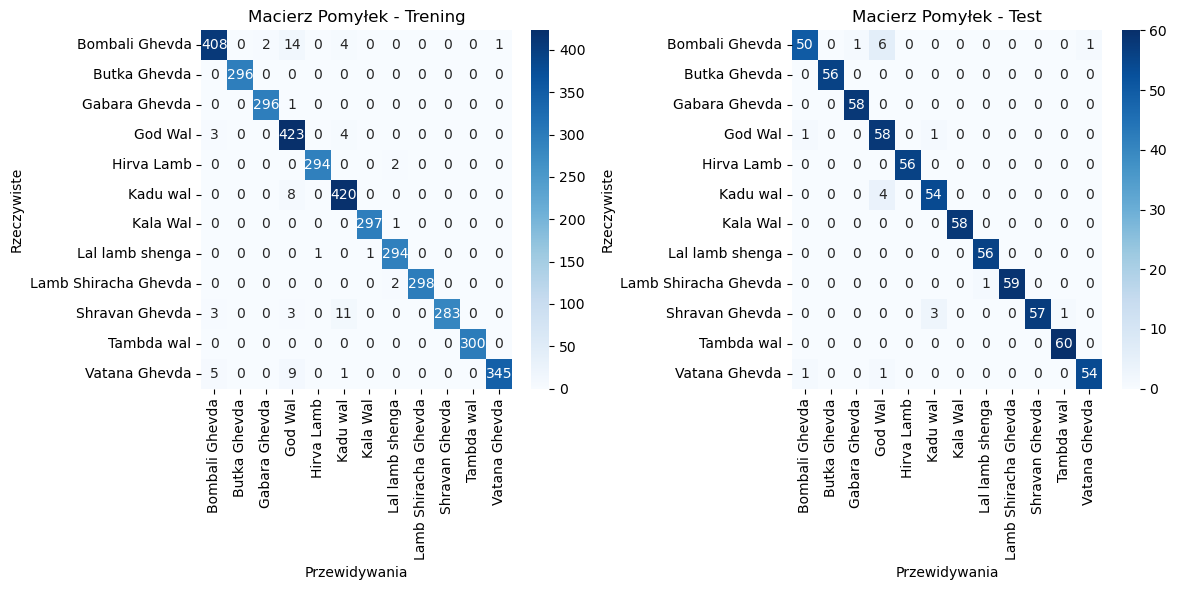

In [9]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
model_soft = VotingClassifier(estimators=estimators, voting='soft', weights=[0.15, 0.65, 0.20])

evaluate_model(model_soft, X_train, X_test, y_train, y_test)

## Stacking

In [10]:
from sklearn.ensemble import StackingClassifier


📊 Dokładność (trening): 0.9516
Precision (trening): 0.9520
Recall (trening): 0.9516
F1 Score (trening): 0.9516
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       0.90      0.86      0.88       429
        Butka Ghevda       1.00      1.00      1.00       296
       Gabara Ghevda       0.99      1.00      0.99       297
             God Wal       0.85      0.89      0.87       430
          Hirva Lamb       0.98      0.99      0.98       296
            Kadu wal       0.94      0.97      0.95       428
            Kala Wal       0.94      0.95      0.94       298
     Lal lamb shenga       0.95      0.90      0.92       296
Lamb Shiracha Ghevda       0.97      0.99      0.98       300
      Shravan Ghevda       0.99      0.95      0.97       300
          Tambda wal       1.00      1.00      1.00       300
       Vatana Ghevda       0.99      0.97      0.98       360

            accuracy                           0

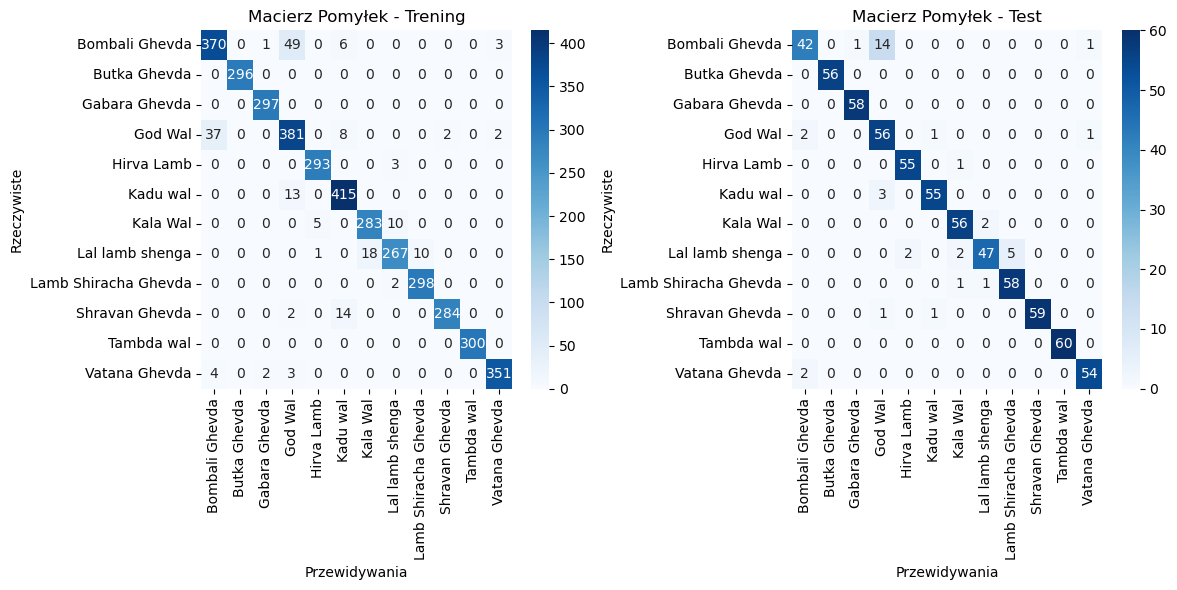

In [11]:
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

evaluate_model(clf, X_train, X_test, y_train, y_test)

## Bootstrap Aggregating

In [12]:
from sklearn.ensemble import BaggingClassifier


📊 Dokładność (trening): 0.8886
Precision (trening): 0.8903
Recall (trening): 0.8886
F1 Score (trening): 0.8887
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       0.80      0.78      0.79       429
        Butka Ghevda       0.96      1.00      0.98       296
       Gabara Ghevda       0.97      0.94      0.95       297
             God Wal       0.76      0.81      0.78       430
          Hirva Lamb       0.91      0.81      0.86       296
            Kadu wal       0.90      0.96      0.93       428
            Kala Wal       0.88      0.88      0.88       298
     Lal lamb shenga       0.85      0.89      0.87       296
Lamb Shiracha Ghevda       0.91      0.93      0.92       300
      Shravan Ghevda       1.00      0.89      0.94       300
          Tambda wal       0.99      1.00      0.99       300
       Vatana Ghevda       0.86      0.85      0.85       360

            accuracy                           0

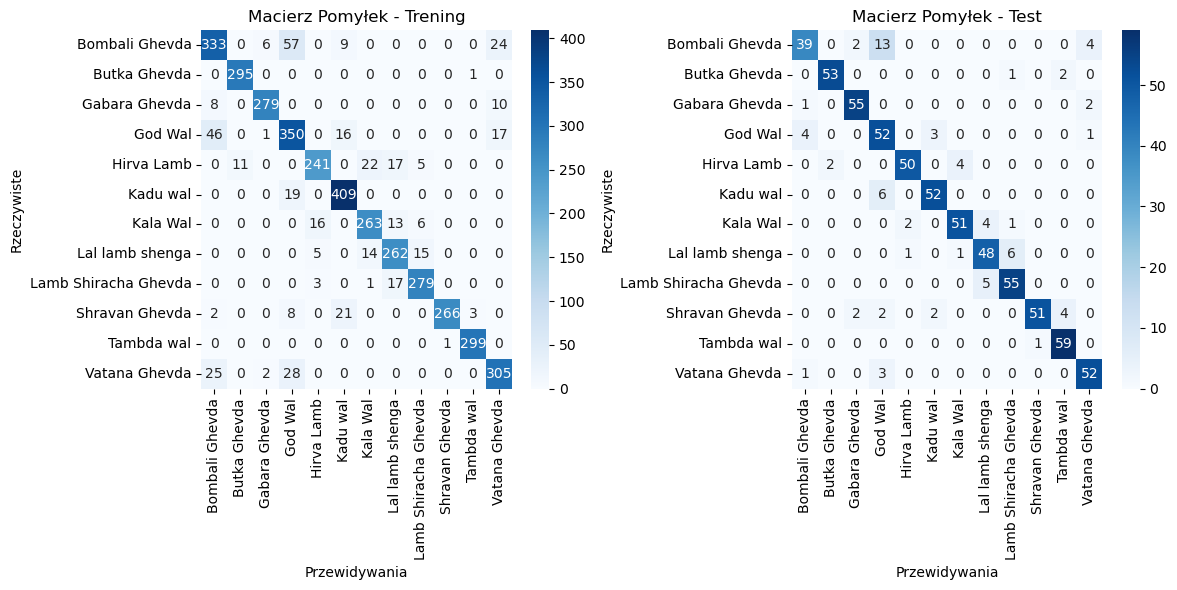

In [13]:
clf = BaggingClassifier(estimator=model3,
                        n_estimators=10)

evaluate_model(clf, X_train, X_test, y_train, y_test)

## Gradient Boosting


📊 Dokładność (trening): 0.8672
Precision (trening): 0.8719
Recall (trening): 0.8672
F1 Score (trening): 0.8674
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       0.83      0.69      0.75       429
        Butka Ghevda       0.92      0.92      0.92       296
       Gabara Ghevda       0.98      0.87      0.92       297
             God Wal       0.70      0.82      0.76       430
          Hirva Lamb       0.85      0.91      0.88       296
            Kadu wal       0.84      0.97      0.90       428
            Kala Wal       0.95      0.90      0.92       298
     Lal lamb shenga       0.81      0.83      0.82       296
Lamb Shiracha Ghevda       0.86      0.83      0.85       300
      Shravan Ghevda       0.96      0.90      0.93       300
          Tambda wal       0.98      0.98      0.98       300
       Vatana Ghevda       0.87      0.85      0.86       360

            accuracy                           0

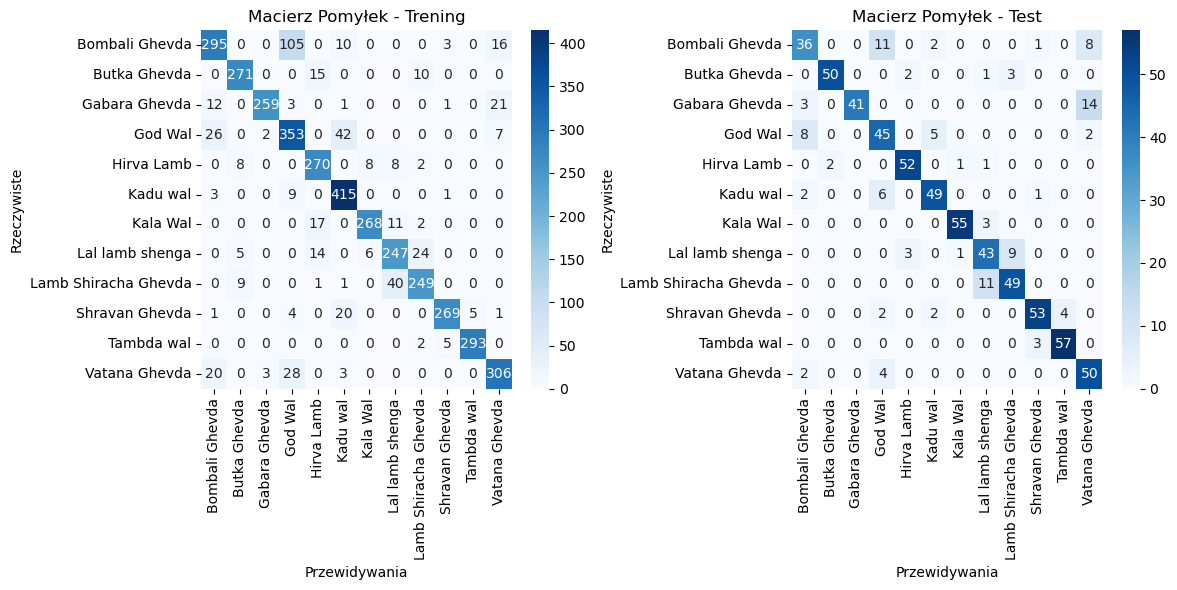

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=1,
                                  learning_rate=0.01) # Szybkość "uczenia" się 

evaluate_model(model, X_train, X_test, y_train, y_test)


📊 Dokładność (trening): 0.8908
Precision (trening): 0.8980
Recall (trening): 0.8908
F1 Score (trening): 0.8911
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       0.86      0.67      0.75       429
        Butka Ghevda       0.94      0.94      0.94       296
       Gabara Ghevda       0.92      0.92      0.92       297
             God Wal       0.70      0.91      0.79       430
          Hirva Lamb       0.91      0.90      0.90       296
            Kadu wal       0.91      0.96      0.93       428
            Kala Wal       0.96      0.95      0.95       298
     Lal lamb shenga       0.83      0.92      0.87       296
Lamb Shiracha Ghevda       0.95      0.88      0.91       300
      Shravan Ghevda       0.98      0.87      0.93       300
          Tambda wal       0.99      0.99      0.99       300
       Vatana Ghevda       0.93      0.85      0.89       360

            accuracy                           0

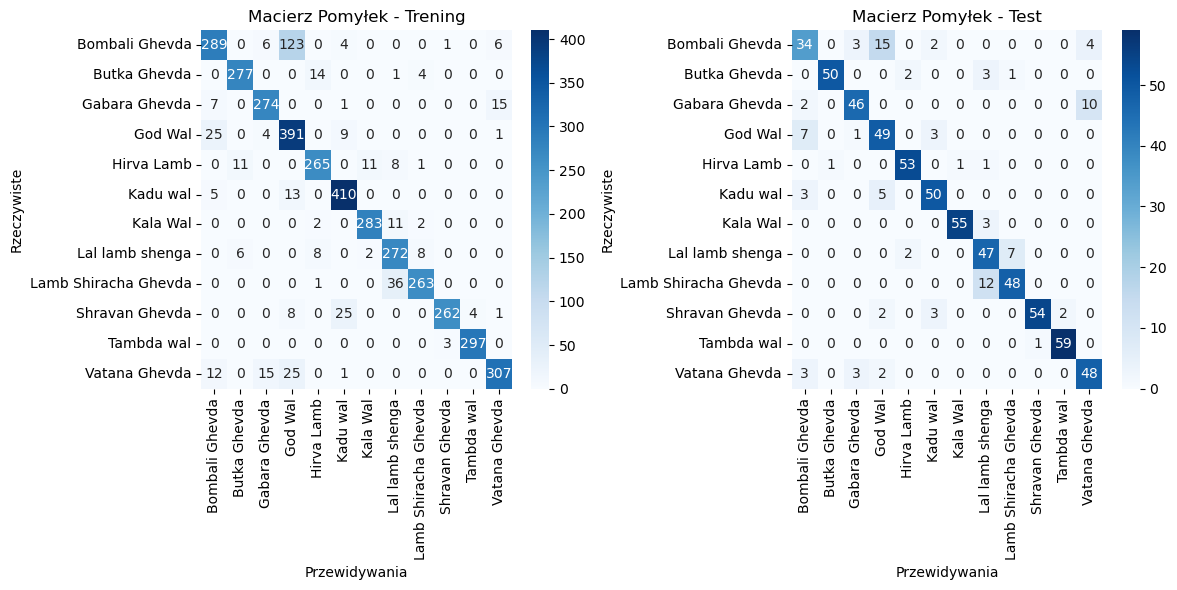

In [15]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Inicjalizacja LabelEncoder
label_encoder = LabelEncoder()

# Zakodowanie etykiet na liczby
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Inicjalizacja modelu XGBClassifier
model = XGBClassifier(random_state=1,
                      learning_rate=0.01, 
                      booster='gbtree', 
                      max_depth=4)


evaluate_model(model, X_train, X_test, y_train, y_test)

In [16]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

In [17]:
# przygotowanie stacking
def get_stacking():
    
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('cart', DecisionTreeClassifier(random_state=1)))
    level0.append(('rf', RandomForestClassifier(n_estimators=1000, # Ilość słabych estymatorów
                                      max_depth=2, # Maksymalna wysokość drzewa w słabym estymatorze
                                      min_samples_split = 2, # Minimalna ilość obserwacji wymagana do podziału węzła
                                      max_features = 3, # Maksymalna ilość zmiennych brana pod uwagę przy podziale węzła
                                      random_state=0,
                                      n_jobs = -1)))
    level0.append(('aboost', AdaBoostClassifier(random_state=1)))
    level0.append(('gboost', GradientBoostingClassifier(random_state=1,
                                      learning_rate=0.01)))
    level0.append(('xgb', XGBClassifier(random_state=1,
                        learning_rate=0.01, # Szybkość "uczenia" się
                        booster='gbtree', # Jaki model wykorzystujemy (drzewo - gbtree, liniowe - gblinear)
                        max_depth=4 # Maksymalna głębokość drzewa 
                        )))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    
    # definicja meta learner model
    level1 = LogisticRegression()
    
    # definicja stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    
    return model

In [18]:
# lista modeli
def get_models():
    
    models = dict()
    models['lr'] = LogisticRegression()
    models['cart'] = DecisionTreeClassifier()
    models['rf'] = RandomForestClassifier(n_estimators=1000, # Ilość słabych estymatorów
                                      max_depth=2, # Maksymalna wysokość drzewa w słabym estymatorze
                                      min_samples_split = 2, # Minimalna ilość obserwacji wymagana do podziału węzła
                                      max_features = 3, # Maksymalna ilość zmiennych brana pod uwagę przy podziale węzła
                                      random_state=0,
                                      n_jobs = -1)
    models['aboost'] = AdaBoostClassifier(random_state=1)
    models['gboost'] = GradientBoostingClassifier(random_state=1,
                                      learning_rate=0.01)
    models['xgb'] = XGBClassifier(random_state=1,
                        learning_rate=0.01, # Szybkość "uczenia" się
                        booster='gbtree', # Jaki model wykorzystujemy (drzewo - gbtree, liniowe - gblinear)
                        max_depth=4 # Maksymalna głębokość drzewa 
                        )
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()

    return models

In [19]:
# ocena modeli przy wykorzystaniu cross-validation
def evaluate_model(model, X, y):
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

    return scores


# Do sprawdzenia istotności cech

In [20]:
clf = RandomForestClassifier(n_estimators=100,  max_depth=7)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7)

In [21]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Dokładność modelu: {accuracy:.4f}")
print("Raport klasyfikacji:\n", report)

Dokładność modelu: 0.8838
Raport klasyfikacji:
                       precision    recall  f1-score   support

      Bombali Ghevda       0.74      0.67      0.70        58
        Butka Ghevda       0.96      0.96      0.96        56
       Gabara Ghevda       1.00      0.86      0.93        58
             God Wal       0.72      0.78      0.75        60
          Hirva Lamb       1.00      0.96      0.98        56
            Kadu wal       0.80      0.91      0.85        58
            Kala Wal       0.95      0.97      0.96        58
     Lal lamb shenga       0.79      0.89      0.84        56
Lamb Shiracha Ghevda       0.91      0.82      0.86        60
      Shravan Ghevda       0.98      0.92      0.95        61
          Tambda wal       1.00      0.98      0.99        60
       Vatana Ghevda       0.80      0.88      0.84        56

            accuracy                           0.88       697
           macro avg       0.89      0.88      0.88       697
        weighted avg

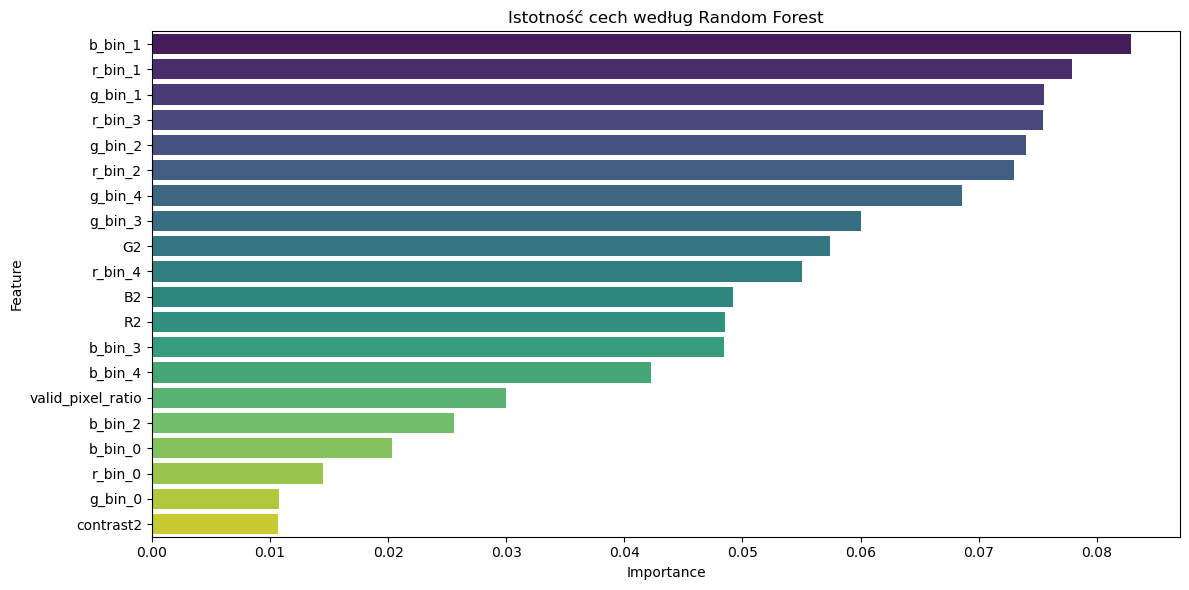

In [22]:
import seaborn as sns
# Tworzymy DataFrame z istotnościami
feature_importance = pd.DataFrame({
    'Feature': train_data.drop(['class', "path", "filename", "R", "G", "B", "brightness"],axis=1).columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Wykres
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Istotność cech według Random Forest')
plt.tight_layout()
plt.show()